In [1]:
import numpy as np
np.random.seed(5)
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.backend import int_shape 
from keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf #Para pruebas
from IPython import display


In [2]:
nombres = open(r"C:\Users\ALEXI\Desktop\ListaDinosuarios.txt",'r').read()
nombres = nombres.lower()

In [3]:
alfabeto = list(set(nombres))
# alfabeto.remove("\xad")
# alfabeto.remove("©")
# alfabeto.remove("ã")
# alfabeto.remove(" ")
# alfabeto.remove("¡")
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)

In [4]:
#Esto es para el entramiento que cada caracter sea represando por el formato ONE HOT(Un vector con el tamañano del alfabeto
# y solo uno de los elementos(del vector) sera diferente de cero) 
#Para eso ocupamos un diccionario que nos permite definir la equivalencia del caracter con el indice correspodiente  del vector ONE HOT
caracterToindice = { letra:interacion for interacion,letra in enumerate(sorted(alfabeto))}

In [5]:
caracterToindice
#Vemos que la A tiene el indice 1 y asi sucesivamente

{'\n': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [6]:
#Una vez entrenada la red recorruente vamos a generar numeros NO CARACTERES
#Para tener el nombre generado ocupamos el proceso inverso osea el caracter el indice indique el caracter
indiceTocaracter= { interacion:letra for interacion,letra in enumerate(sorted(alfabeto))}

In [7]:
indiceTocaracter

{0: '\n',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [8]:
tam_alfabeto

27

In [9]:
tam_datos

19909

In [10]:
n_a = 25 # Número de nueronas de capa ocula
#Creamos dos contenedores
#Checar con la profe ejemplo de interne que habla de time_step
entrada = Input(shape=(None,tam_alfabeto),name="Input-layer") #Xt None Nos permite tener entradas (Nombres de diccionario) con tamaños variables
#Que vendria siendo un caracter del set del entremiento que se representa con un vector de 26 elementos(one-hot) (tamaño del alfabeto)
a0 = Input(shape=(n_a,),name="Estado oculto a-1") #a-1 estado oculto que se representa con un vector del mismo tamaño de la capa oculta

#### Debug 

##### Entrada 


In [11]:
print("Tipo",type(entrada))
print("Rango/Dimesion",tf.keras.backend.ndim(entrada))
print("shape/Forma",entrada.shape)
#Nos damos cuenta que entrada es un kerasTensor
#Rango es una variable, rango 1 es una lista o arreglo, rango 2 es una arreglo bidemsional, rango 3 en adelante un un arrgleo multidimesional

Tipo <class 'keras.engine.keras_tensor.KerasTensor'>
Rango/Dimesion 3
shape/Forma (None, None, 27)


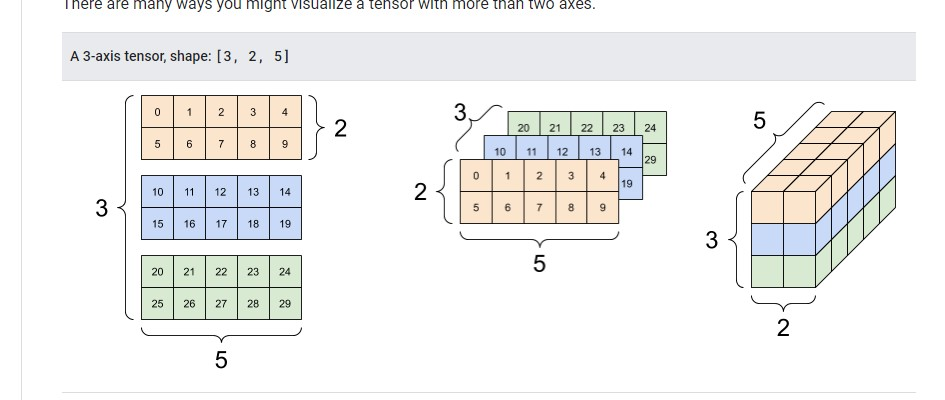

In [12]:
display.Image(r"C:\Users\ALEXI\Desktop\TensorRango3.jpg")


##### a0

In [13]:
print("Tipo",type(a0))
print("Rango/Dimesion",tf.keras.backend.ndim(a0))
print("shape/Forma",a0.shape)

Tipo <class 'keras.engine.keras_tensor.KerasTensor'>
Rango/Dimesion 2
shape/Forma (None, 25)


##### Test

In [14]:

variable = tf.Variable([[5,8],[5,2],[5,8]])


In [15]:
# variable
print(tf.rank(variable))
print(variable.shape)

variable


tf.Tensor(2, shape=(), dtype=int32)
(3, 2)


<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[5, 8],
       [5, 2],
       [5, 8]])>

## Celda recurrente

In [16]:
#Esta es mi mi capa oculta 
celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state = True,name="Hidden-recurrent-Layer")
#return_state = True para que la salida nos entregue en nuevo estado oculto actualizado osea at


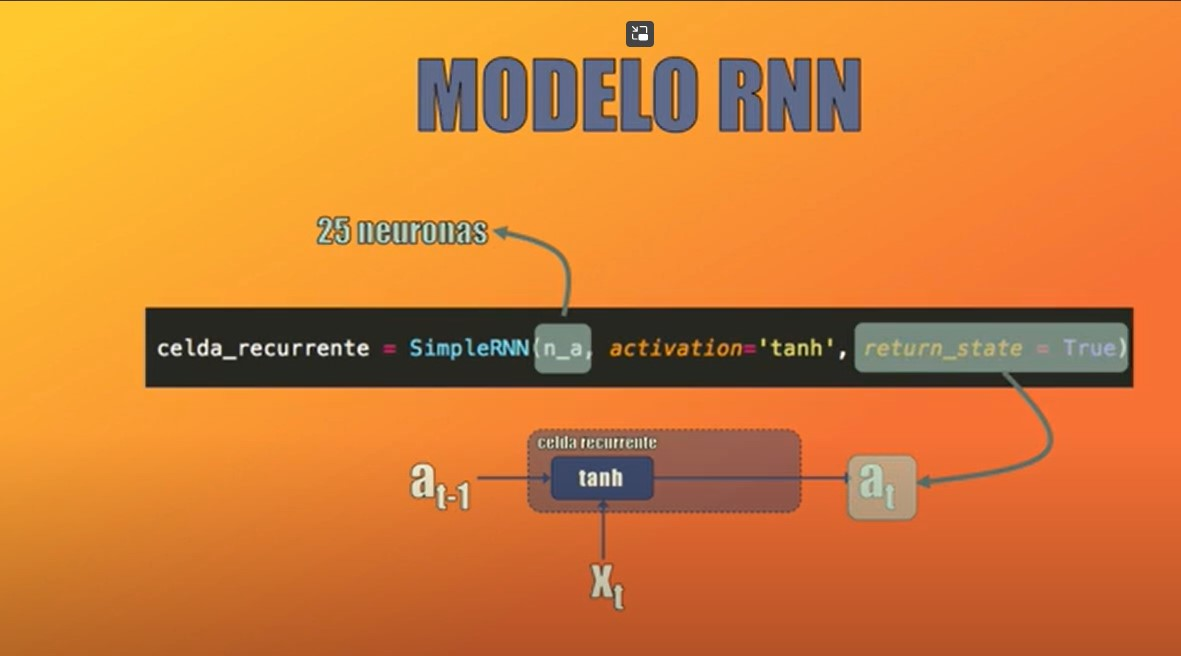

In [17]:
display.Image(r"C:\Users\ALEXI\Desktop\Celda_recurrente.jpg")


In [18]:
type(celda_recurrente)

keras.layers.rnn.simple_rnn.SimpleRNN

## Capa de salida

In [19]:
#26 neuronas de salida que es el tamaño del alfabeto
#Esta capa de salida tomara la activacion generada por la celda recurrente(Ver mas abajo)
#y genera la salida Y 
capa_salida = Dense(tam_alfabeto, activation='softmax',name="Output-Layer")#Esta genera la predicion

In [20]:
capa_salida

In [21]:
type(capa_salida)

keras.layers.core.dense.Dense

## MODELO RNN 

In [22]:
#Instaciamos la celda recurrente(capa oculta)
# agregando la dos entradas xt y at-1(a0)
# y este nos regresa su salida de estado oculto actual(at)
#TODO:Checar que signfica _ 
estadoOculto, _ = celda_recurrente(entrada, initial_state=a0)
#estadoOculto = at 
salida = []
#capa_salida(estadoOculto) aqui es donde la capa de salida tomara  la activacion generada por la celda recurrente osea el estado oculto actual 
#La variable salida enlaza la activacion  entregada por la celda recurrente
#creo yo que ccuando le pasas a capa de salida el estado oculto le dices la cantida de entradas que va tener la capa de salida
salida.append(capa_salida(estadoOculto))
#Aqui ya unimos todo

In [23]:
salida

[<KerasTensor: shape=(None, 27) dtype=float32 (created by layer 'Output-Layer')>]

In [24]:
#Aqui creamos el modelo dejando explicito que va tener dos entradas el caracter actual 
#el estado oculto anterio
#y la salida correspodiente a la predicion
modelo = Model([entrada,a0],salida)

#Optimizador gradiente decenten 
opt = SGD(learning_rate=0.0005)
modelo.compile(optimizer=opt,loss='categorical_crossentropy')
#Listo ya tenemos nuestro modelo listo

In [25]:
type(estadoOculto)

keras.engine.keras_tensor.KerasTensor

### Preparamos datos para el entremiento

In [26]:
# creamos una lista con los acomodados aletaoriomente
with open(r"C:\Users\ALEXI\Desktop\ListaDinosuarios.txt") as f:
    ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]
np.random.shuffle(ejemplos)

In [27]:
#ejemplos
#SON UN CHINGO POR ESO SE COMENTO LA LINEA

In [28]:
#La funcion toma uno a uno cada ejemplo de entramiento y que genere tres vectores que seran las entradas al modelo
#Este genera tres vectores que son las entradas al modelo 
#La entrada X 
#La SALIDA Y 
#La activacion inicial (a) que sera una matriz de ceros y esta se ira actualizando lo que se presenta los caracteres al modelo durante el entramiento
#El primer caracter siempre sera un vector de ceros
#La salida Y sera tomar la entrada y desplazar un caracter a la derecha 
def trainGeneratorDebug():
    while True:
        # Tomar un ejemplo aleatorio
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

        # Convertir el ejemplo a representación numérica
        # Toma el ejemplo y lo convierte en un vector[Lista] de numeros
        X = [None] + [caracterToindice[c] for c in ejemplo]
        print("Vector X de letras a numeros (SIN ONE HOT) ",X)

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [caracterToindice['\n']]
        print("Vector Y de letras a numero pero con el desplazamiento (SIN ONE HOT)",Y)

        # Representar "X" y "Y" en formato one-hot
        x = np.zeros((len(X),1,tam_alfabeto))
        print("Dimesion de vector X one Hot",x.shape)
        print("Vector one hot incializado en ceros(Matriz 3D)\n",x)
        #https://opensourceoptions.com/blog/numpy-array-shapes-and-reshaping-arrays/
        print("Fin de la matriz de la 3D")
        # X[1:] Tomar el vector(Lista) X pero omitiendo el indice cero
        print("Dimension de funcion to_categorical",to_categorical(X[1:],tam_alfabeto).shape)
        print("to_categorical antes de reshape\n",to_categorical(X[1:],tam_alfabeto))
        #La parte de codigo del reshape convierte una matrix Bimensional a una de 3 dimesiones
        onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)
        print("Dimesion de to_categorical Despues de reshape\n (el primero valor son las capas, el segundo las filas y la tercera las columnas)",onehot.shape)
        print("to_categorical Despues de reshape\n",onehot)
        #Hacen esto para que la primera capa sea de ceros dando entener que el NONE que se muestra en la linea 13 
        x[1:,:,:] = onehot
        print("Vector X CON ONE HOT LISTO\n",x)
        y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)
        print("Vector Y CON ONE HOT\n",y)

        # Activación inicial (matriz de ceros)
        a = np.zeros((len(X), n_a))

        yield [x, a], y

In [29]:
#Original del video
def train_generator():
    numero = 0
    while True:
        # Tomar un ejemplo aleatorio
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

        # Convertir el ejemplo a representación numérica
        X = [None] + [caracterToindice[c] for c in ejemplo]

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [caracterToindice['\n']]

        # Representar "X" y "Y" en formato one-hot
        x = np.zeros((len(X),1,tam_alfabeto))
        onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)
        x[1:,:,:] = onehot
        y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)
        
        # Activación inicial (matriz de ceros)
        a = np.zeros((len(X), n_a))
        numero +=1
        # print("Vuelta",numero)
        yield [x, a], y

In [30]:
trainGeneratorDebug()

<generator object trainGeneratorDebug at 0x000001F212FBAEB0>

In [31]:
#https://platzi.com/tutoriales/1378-python/3390-yield-in-python/?gclid=Cj0KCQiAsoycBhC6ARIsAPPbeLs7pmV0YeibAzy16L9ld3qhk-G4grOJTz2_wfozG4KZ-TCWT-hcxhkaAjDfEALw_wcB&gclsrc=aw.ds
#Enlace para le explicacion yield 
#DESCOMENTAR PARA VER LOS RESULTADOS DE LA FUNCION 
# for x,y in trainGeneratorDebug():
#     print("---------INICIO---------")
#     print("entrada x\n",x[0])
#     print("Entrda a\n",x[1])
#     print("Entrada y\n",y)
#     print("------FIN--------")
    

## Nota 


### Creo yo que la forma que se creo el codigo es una forma legacy o tambien para ver el funcionamiento de una RNN mas a fondo y para hacer pruebas como debug 

## Entramiento

In [32]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [33]:
# modelo.fit(x=train_generator(),steps_per_epoch=80, epochs=1, verbose=0)

In [34]:
#checar muy bien con al profe esta parte de codigo de las interaciones
BATCH_SIZE = 80			# Número de ejemplos de entrenamiento a usar en cada iteración
NITS = 10000			# Número de iteraciones

for j in range(NITS):
    historia = modelo.fit(x=train_generator(),steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)
    # print(j)

  
    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%1000 == 0:
        print('\nIteración: %d, Error: %f' % (j, historia.history['loss'][0]) + '\n')
# modelo.fit() argumento x pueder  = A generator or `keras.utils.Sequence` returning `(inputs,targets)



Iteración: 0, Error: 3.335061


Iteración: 1000, Error: 2.385567


Iteración: 2000, Error: 2.246599


Iteración: 3000, Error: 2.174537


Iteración: 4000, Error: 2.195888


Iteración: 5000, Error: 2.166470


Iteración: 6000, Error: 2.123629


Iteración: 7000, Error: 2.242113


Iteración: 8000, Error: 2.197699


Iteración: 9000, Error: 2.168021



## Nombre generados

In [35]:
def generar_nombre(modelo,car_a_num,tam_alfabeto,n_a):
    # Inicializar x y a con ceros
    #Entrada x y estado oculto
    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    # Nombre generado y caracter de fin de linea
    nombre_generado = ''
    fin_linea = '\n'
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          
          #Regresa la activacion actual          
          # a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          # # print("Estado oculto actual",a)#Debe ser una matriz de 1x25
          # y = capa_salida(a)
          # # print(y.shape)
          # # print("Salida",type(y))
          # # print("Con predicion",type(K.eval(y)))
          # prediccion = K.eval(y)
          prediccion = modelo.predict([K.constant(x),K.constant(a)])
          # print("predicion",prediccion)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())
          # print("Indice seleccionado",ix)

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          # print("Numero acutal",car_a_num[ix])
          car = car_a_num[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print("Nombre generado",nombre_generado)

In [36]:
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-layer (InputLayer)       [(None, None, 27)]   0           []                               
                                                                                                  
 Estado oculto a-1 (InputLayer)  [(None, 25)]        0           []                               
                                                                                                  
 Hidden-recurrent-Layer (Simple  [(None, 25),        1325        ['Input-layer[0][0]',            
 RNN)                            (None, 25)]                      'Estado oculto a-1[0][0]']      
                                                                                                  
 Output-Layer (Dense)           (None, 27)           702         ['Hidden-recurrent-Layer[0][0

In [37]:
for i in range(100):
    generar_nombre(modelo,indiceTocaracter,tam_alfabeto,n_a)

1/1 [==============================] - 0s 67ms/step
Nombre generado zosarusaun

1/1 [==============================] - 0s 56ms/step
Nombre generado amous

1/1 [==============================] - 0s 96ms/step
Nombre generado auravaururuiots

1/1 [==============================] - 0s 66ms/step
Nombre generado saus

1/1 [==============================] - 0s 56ms/step
Nombre generado osatuodochurausaleon

1/1 [==============================] - 0s 38ms/step
Nombre generado s

1/1 [==============================] - 0s 157ms/step
Nombre generado mcrivururusostralzs

1/1 [==============================] - 0s 85ms/step
Nombre generado 

1/1 [==============================] - 0s 44ms/step
Nombre generado ehusaqchonliausactltmurua

1/1 [==============================] - 0s 52ms/step
Nombre generado os

1/1 [==============================] - 0s 71ms/step
Nombre generado osisasaunitaraptaraur

1/1 [==============================] - 0s 71ms/step
Nombre generado udoraurus

1/1 [=======================